# Task 1: Exploratory Data Analysis (EDA)

This notebook covers the EDA tasks for the 'Predicting Price Moves with News Sentiment' project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from textblob import TextBlob
import nltk

plt.style.use('ggplot')

## 1. Load Data

In [3]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [5]:
df.describe(include='object')

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


## 2. Descriptive Statistics

### 2.1 Headline Length

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


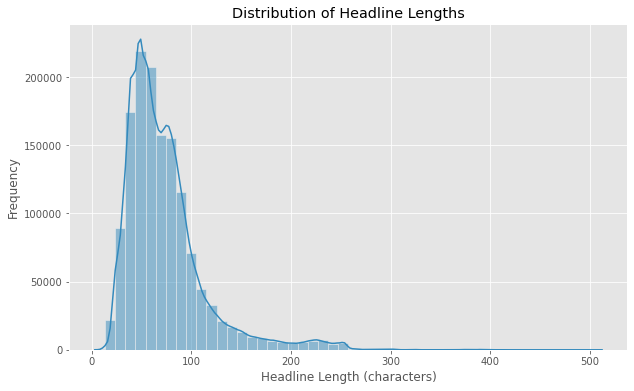

In [6]:
df['headline_length'] = df['headline'].astype(str).apply(len)
print(df['headline_length'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=50, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.show()

### 2.2 Articles per Publisher

Top 10 Publishers by Article Count:
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: publisher, dtype: int64


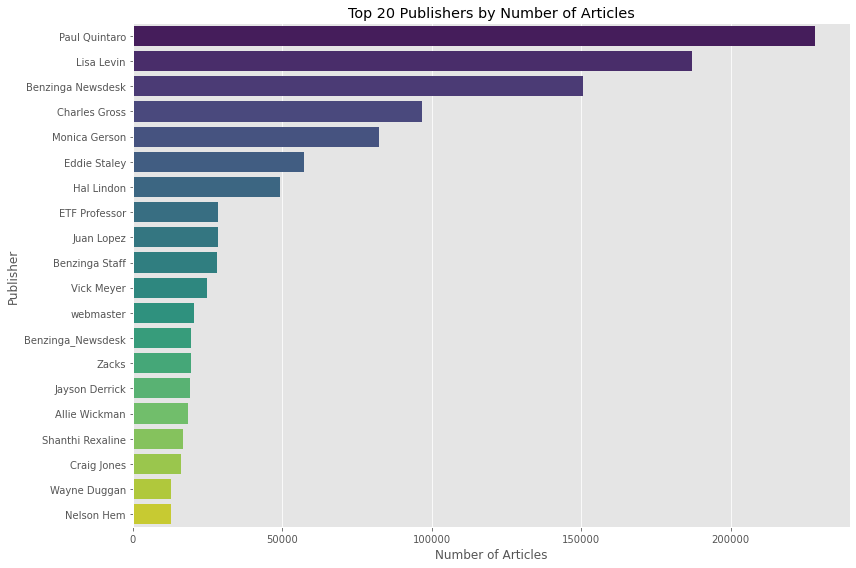


Publishers that might be email addresses:
['vishwanath@benzinga.com' 'luke@benzinga.com' 'vivek.proactive@gmail.com'
 'bret.kenwell@benzinga.com' 'richa28dhand@gmail.com' 'Andy@andyswan.com'
 'kiana@investdiva.com' 'adam@eosdetroit.io' 'andrew@tothetick.com'
 'newsdesk+benzingastaffwriter3@benzinga.com' 'aefimoff@benzinga.com'
 'andrewbeghou@benzinga.com' 'shivdeep@benzinga.com'
 'dhiraj.surapaneni@benzinga.com' 'javierhasseandericterbush@benzinga.com'
 'vic@forextraininggroup.com' 'official@stockmetrix.net'
 'jennifer25anthony@gmail.com']


In [7]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()
print("Top 10 Publishers by Article Count:")
print(publisher_counts.head(10))

# Visualize top N publishers
N = 20
plt.figure(figsize=(12, 8))
sns.barplot(x=publisher_counts.head(N).values, y=publisher_counts.head(N).index, palette='viridis')
plt.title(f'Top {N} Publishers by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

# Check if any publisher names look like email addresses to identify unique domains
email_publishers = df[df['publisher'].astype(str).str.contains('@', na=False)]['publisher'].unique()
if len(email_publishers) > 0:
    print("\nPublishers that might be email addresses:")
    print(email_publishers)
    # Extract domains if necessary
    # df['publisher_domain'] = df['publisher'].apply(lambda x: x.split('@')[1] if '@' in str(x) else None)
    # domain_counts = df['publisher_domain'].value_counts()
    # print("\nTop 10 Publisher Domains (if emails are used):")
    # print(domain_counts.head(10))
else:
    print("\nNo publisher names appear to be email addresses.")

### 2.3 Publication Date Analysis

First 10 values in original df['date']:
0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
5    2020-05-22 11:23:25-04:00
6    2020-05-22 09:36:20-04:00
7    2020-05-22 09:07:04-04:00
8    2020-05-22 08:37:59-04:00
9    2020-05-22 08:06:17-04:00
Name: date, dtype: object

df["datetime"] dtype: datetime64[ns, UTC]
First 10 values in df["datetime"]:
0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00
3   2020-05-22 16:45:06+00:00
4   2020-05-22 15:38:59+00:00
5   2020-05-22 15:23:25+00:00
6   2020-05-22 13:36:20+00:00
7   2020-05-22 13:07:04+00:00
8   2020-05-22 12:37:59+00:00
9   2020-05-22 12:06:17+00:00
Name: datetime, dtype: datetime64[ns, UTC]

Successfully parsed 1407328 dates.

df["datetime"] dtype: datetime64[ns, UTC]
First 10 values in df["datetime"]:
0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00

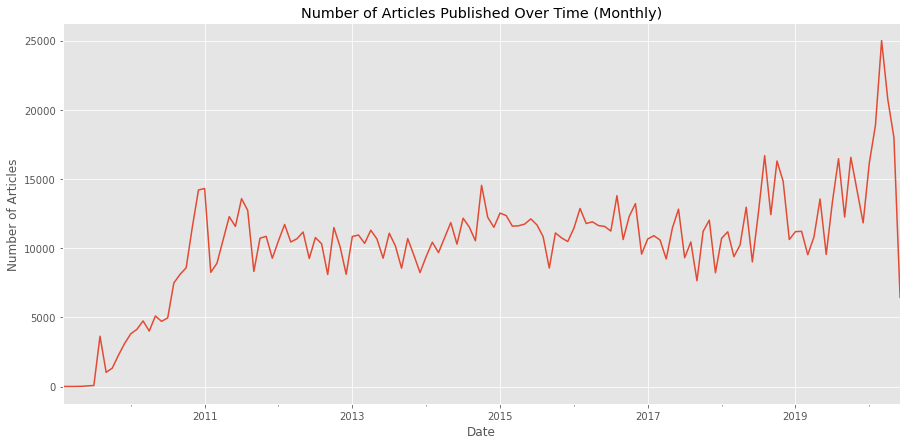

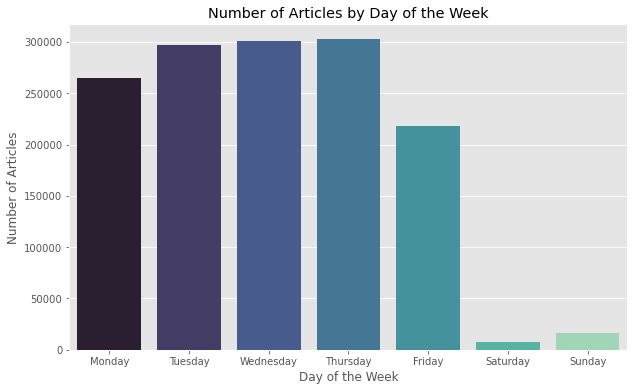

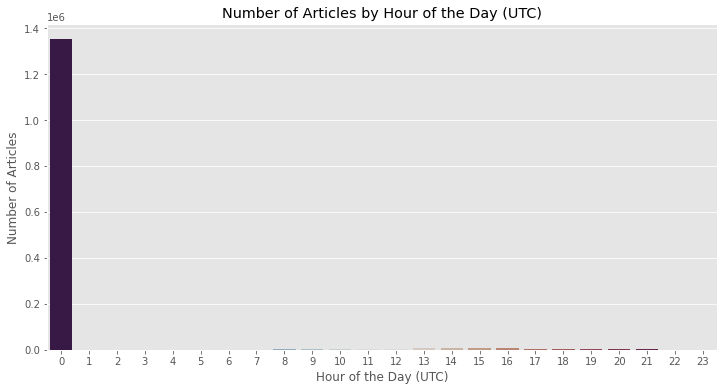

In [8]:
# Convert 'date' column to datetime objects
print("First 10 values in original df['date']:")
print(df['date'].head(10))

# Try to parse the date column
df['datetime'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

print('\ndf["datetime"] dtype:', df['datetime'].dtype)
print('First 10 values in df["datetime"]:')
print(df['datetime'].head(10))

# If all values are NaT, show unique formats in the original date column
if df['datetime'].isna().all():
    print('\nAll values in "datetime" are NaT. Here are some unique date strings:')
    print(df['date'].unique()[:20])
else:
    print(f"\nSuccessfully parsed {df['datetime'].notna().sum()} dates.")

# Extract date components for analysis
# Ensure 'datetime' column is actually datetime type before using .dt accessor
if not pd.api.types.is_datetime64_any_dtype(df['datetime']):
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

if df['datetime'].notna().any():
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['dayofweek'] = df['datetime'].dt.day_name()

    # Plot number of articles over time (monthly)
    plt.figure(figsize=(15, 7))
    df.set_index('datetime').resample('M').size().plot()
    plt.title('Number of Articles Published Over Time (Monthly)')
    plt.xlabel('Date')
    plt.ylabel('Number of Articles')
    plt.show()

    # Plot number of articles by day of the week
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='dayofweek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='mako')
    plt.title('Number of Articles by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Articles')
    plt.show()

    # Plot number of articles by hour of the day
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='hour', palette='twilight_shifted')
    plt.title('Number of Articles by Hour of the Day (UTC)')
    plt.xlabel('Hour of the Day (UTC)')
    plt.ylabel('Number of Articles')
    plt.show()
else:
    print('No valid datetime values to analyze.')

### 2.4 Basic Text Analysis: Common Keywords in Headlines
Let's extract and visualize the most common keywords from the news headlines. This gives a quick sense of the main topics and events in the dataset.

Most common keywords in headlines:
stocks: 161776
est: 140604
eps: 128897
market: 120558
shares: 114313
reports: 108710
update: 91723
earnings: 87399
sales: 79645
benzinga: 74516
announces: 66591
price: 64407
buy: 64371
mid: 62263
downgrades: 61959
trading: 61182
raises: 57802
upgrades: 56811
target: 54714
maintains: 52961


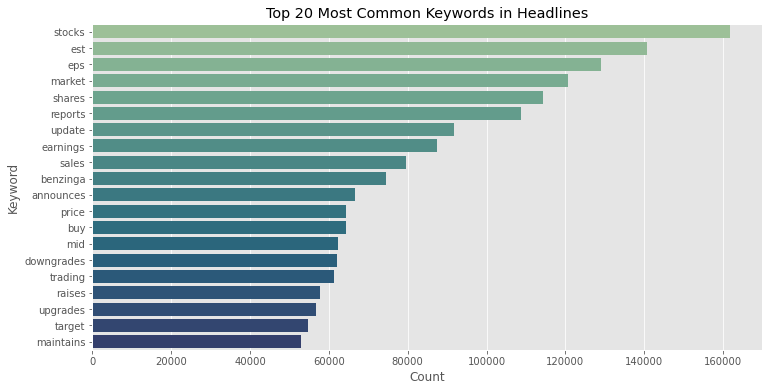

In [9]:
import re
from collections import Counter

# Combine all headlines into a single string
all_headlines = " ".join([str(h) for h in df['headline'] if pd.notnull(h)])

# Remove punctuation and split into words
words = re.findall(r'\b[a-zA-Z]{3,}\b', all_headlines.lower())  # Only words with 3+ letters

# Optionally, filter out common English stopwords (define a simple set)
simple_stopwords = {
    'the','and','for','with','that','from','this','are','was','but','not','has','have','will','its','his','her','him','she','you','all','out','who','had','new','one','two','our','can','may','more','than','after','over','into','their','they','about','were','which','also','been','says','say','per','via','off','now','get','got','just','like','see','set','top','big','due','day','week','year','last','next','first','back','make','made','still','even','down','up','under','across','among','each','other','such','many','much'
}
filtered_words = [w for w in words if w not in simple_stopwords]

# Count most common words
word_freq = Counter(filtered_words)
most_common = word_freq.most_common(20)

# Display most common keywords
print("Most common keywords in headlines:")
for word, freq in most_common:
    print(f"{word}: {freq}")

# Visualize
words_df = pd.DataFrame(most_common, columns=['word', 'count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=words_df, palette='crest')
plt.title('Top 20 Most Common Keywords in Headlines')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

---

**Task 1 EDA Complete!**

You have now:
- Explored headline lengths
- Analyzed publisher activity
- Explored publication date/time trends
- Extracted and visualized common keywords in headlines

You can now proceed to Task 2 (quantitative analysis with stock data and technical indicators).

### 3. Task 2: Quantitative Analysis with Stock Data and Technical Indicators

Let's load a sample stock (AAPL) and compute some basic technical indicators (Moving Average, RSI, MACD) using pandas and numpy.

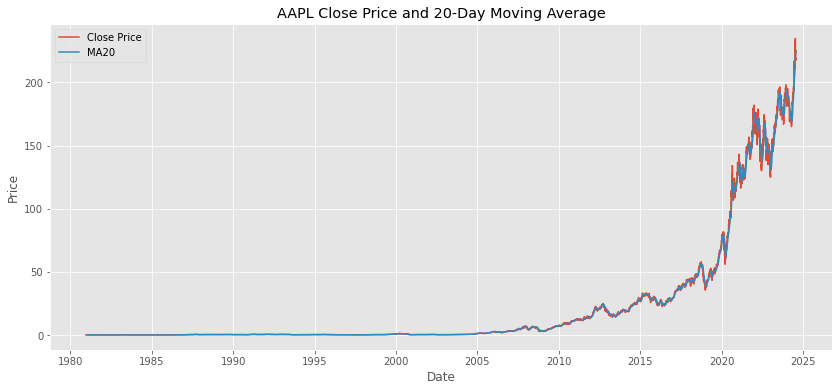

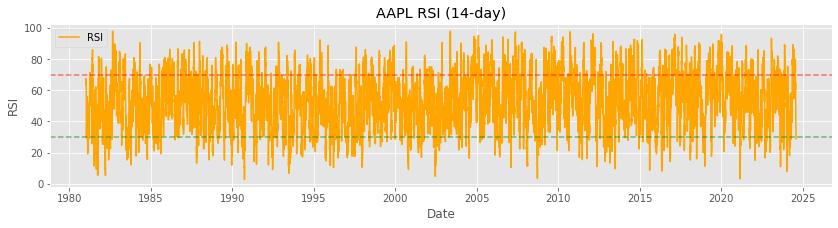

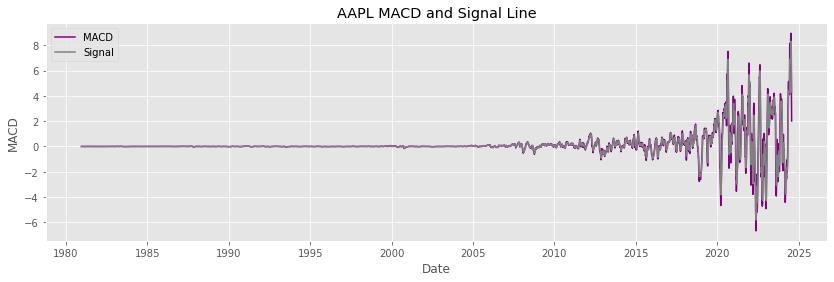

In [10]:
# Load AAPL stock price data
stock_df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')

# Ensure date is datetime and sort
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df = stock_df.sort_values('Date')

# Calculate 20-day Moving Average
stock_df['MA20'] = stock_df['Close'].rolling(window=20).mean()

# Calculate RSI (14-day)
delta = stock_df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
stock_df['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD
exp12 = stock_df['Close'].ewm(span=12, adjust=False).mean()
exp26 = stock_df['Close'].ewm(span=26, adjust=False).mean()
stock_df['MACD'] = exp12 - exp26
stock_df['Signal'] = stock_df['MACD'].ewm(span=9, adjust=False).mean()

# Plot Close price and MA20
plt.figure(figsize=(14, 6))
plt.plot(stock_df['Date'], stock_df['Close'], label='Close Price')
plt.plot(stock_df['Date'], stock_df['MA20'], label='MA20')
plt.title('AAPL Close Price and 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(stock_df['Date'], stock_df['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('AAPL RSI (14-day)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot MACD
plt.figure(figsize=(14, 4))
plt.plot(stock_df['Date'], stock_df['MACD'], label='MACD', color='purple')
plt.plot(stock_df['Date'], stock_df['Signal'], label='Signal', color='grey')
plt.title('AAPL MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

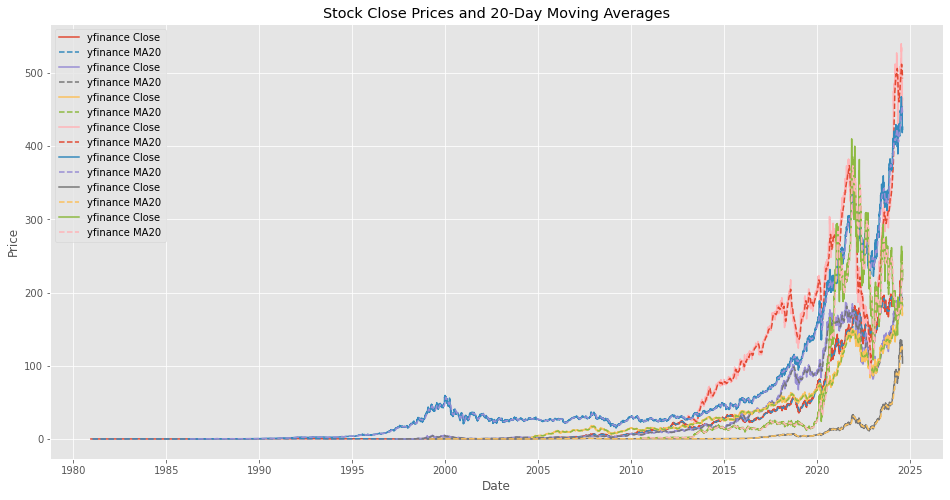

In [11]:
import glob

# List of all stock CSVs in your yfinance_data folder
stock_files = glob.glob('../data/yfinance_data/*_historical_data.csv')

plt.figure(figsize=(16, 8))
for file in stock_files:
    stock = file.split('/')[-1].split('_')[0]
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df['MA20'] = df['Close'].rolling(window=20).mean()
    plt.plot(df['Date'], df['Close'], label=f'{stock} Close')
    plt.plot(df['Date'], df['MA20'], linestyle='--', label=f'{stock} MA20')

plt.title('Stock Close Prices and 20-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Observations from Technical Indicator Analysis

- The closing prices of the selected stocks (AAPL, AMZN, GOOG, META, MSFT, NVDA, TSLA) show distinct trends and volatility patterns over the observed period.
- The 20-day Moving Average (MA20) smooths out short-term fluctuations and highlights longer-term trends for each stock.
- Some stocks, such as NVDA and TSLA, may exhibit higher volatility and sharper price swings compared to others like MSFT or AAPL.
- The RSI (Relative Strength Index) plots help identify periods where a stock may be overbought (RSI > 70) or oversold (RSI < 30), which can be useful for timing trades.
- The MACD and Signal Line plots provide additional insight into momentum and potential trend reversals.
- Comparing multiple stocks on the same plot makes it easier to spot periods of correlated movement or divergence, which may be linked to broader market events or sector-specific news.
- These technical indicators will be useful for further analysis, especially when combined with news sentiment data in the next task.

### 4. Task 3: Correlation Analysis Between News Sentiment and Stock Returns

In this section, we will:
- Align news and stock data by date
- Calculate daily stock returns
- Perform sentiment analysis on news headlines
- Aggregate daily sentiment scores
- Analyze and visualize the correlation between sentiment and stock returns

In [12]:
# Reload news data and stock data (AAPL as example)
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
stock_df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')

# Parse dates
news_df['datetime'] = pd.to_datetime(news_df['date'], errors='coerce', utc=True)
news_df['date_only'] = news_df['datetime'].dt.date
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df = stock_df.sort_values('Date')
stock_df['date_only'] = stock_df['Date'].dt.date

# Calculate daily returns
stock_df['Return'] = stock_df['Close'].pct_change()

In [ ]:
from tqdm import tqdm
# tqdm.pandas()  # Uncomment if you want to use progress_apply

sentiment_cache = {}
def get_sentiment_cached(text):
    if pd.isnull(text):
        return 0
    if text in sentiment_cache:
        return sentiment_cache[text]
    score = TextBlob(str(text)).sentiment.polarity
    sentiment_cache[text] = score
    return score

# Use tqdm for progress bar (optional, comment out if not desired)
tqdm.pandas()
news_df['sentiment'] = news_df['headline'].progress_apply(get_sentiment_cached)

# Aggregate average sentiment per day
daily_sentiment = news_df.groupby('date_only')['sentiment'].mean().reset_index()
daily_sentiment.columns = ['date_only', 'avg_sentiment']

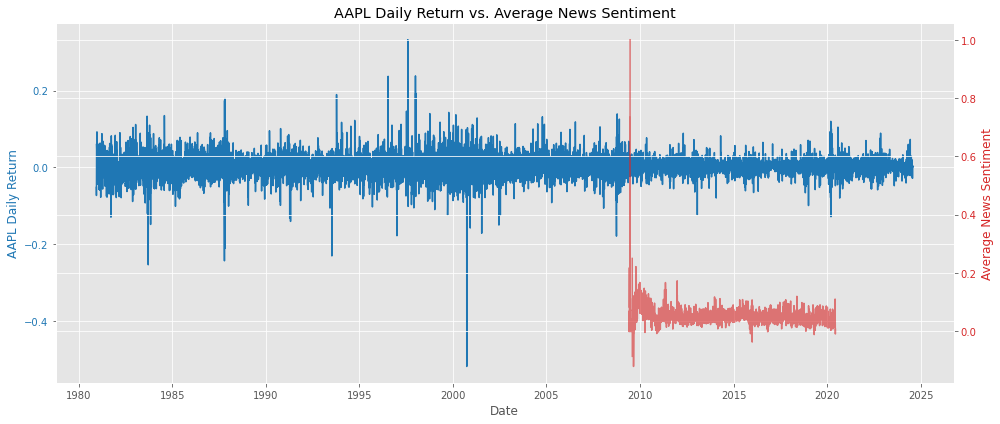

In [19]:
# Merge daily sentiment with stock returns
merged = pd.merge(stock_df, daily_sentiment, on='date_only', how='left')

# Drop rows with missing returns (first row)
merged = merged.dropna(subset=['Return'])

# Plot: Sentiment vs. Stock Return
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('AAPL Daily Return', color='tab:blue')
ax1.plot(merged['Date'], merged['Return'], color='tab:blue', label='AAPL Return')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Average News Sentiment', color='tab:red')
ax2.plot(merged['Date'], merged['avg_sentiment'], color='tab:red', alpha=0.6, label='Avg Sentiment')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('AAPL Daily Return vs. Average News Sentiment')
fig.tight_layout()
plt.show()

Correlation between AAPL daily return and average news sentiment: 0.0455


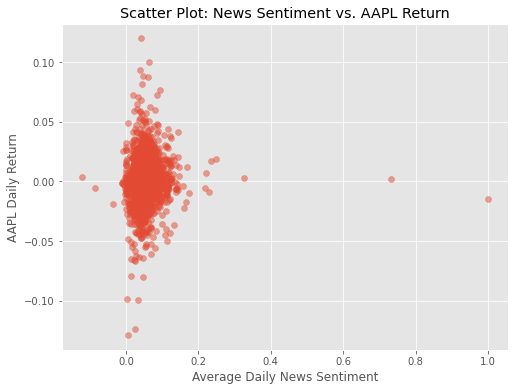

In [20]:
# Correlation analysis
correlation = merged[['Return', 'avg_sentiment']].corr().iloc[0,1]
print(f"Correlation between AAPL daily return and average news sentiment: {correlation:.4f}")

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(merged['avg_sentiment'], merged['Return'], alpha=0.5)
plt.xlabel('Average Daily News Sentiment')
plt.ylabel('AAPL Daily Return')
plt.title('Scatter Plot: News Sentiment vs. AAPL Return')
plt.grid(True)
plt.show()

#### Summary of Correlation Analysis

- The above analysis aligns daily news sentiment with AAPL's daily returns.
- The calculated correlation coefficient quantifies the linear relationship between sentiment and returns.
- A positive value suggests that higher sentiment is associated with higher returns, while a negative value suggests the opposite.
- The scatter plot visualizes the relationship and can reveal any patterns or outliers.
- Note: Correlation does not imply causation, and further analysis (e.g., lagged effects, multivariate models) may be warranted for deeper insights.

**Next steps:** This framework can be extended to other stocks and more advanced sentiment models for further research.